## Problem 1
Given: $N \sim Poisson(\lambda)$ and $X_1, \dots, X_n \sim \vec{\pi}$

$X_k(t)$ is continous time MC with $X_k(0) = X_k$
$N_t(a) = $\{k:X_k(t) = a\}$

i.e. $N_t$ is the number of visits to state $a$ in time $t$.

$\sum_a\pi(a)Q_{ab}=0$ for each $b$ with the constraint $\sum_a\pi(a)=1$


$\sum_a\pi(a)Q_{ab}=0$ $\implies$ $\vec{\pi}^TQ=0$ $\implies$ 

$$
\begin{align*}
\vec{\pi}^TQ&=0\\
\Longleftrightarrow \vec{\pi}^TQ^n&=0\ \  \forall n \geq 1\\ 
\Longleftrightarrow \sum_{n\geq 1}\vec{\pi}\frac{t^n}{n!}Q^n &=0 \ \  \forall t \geq 0\\
\Longleftrightarrow \vec{\pi}\sum_{n\geq 0}\frac{t^n}{n!}Q^n &=\vec{\pi}\\
\Longleftrightarrow \vec{\pi}P &=\vec{\pi}\\
\Longleftrightarrow \vec{\pi}\  \text{is a stationary distribution}
\end{align*}
$$

Now, $P(X_k(t)=a)=\pi(a)$ and $N_t(a) = \{k:X_k(t) = a\}$ $\implies$ $N_t(a)|N \sim Binom(N, \pi(a))$ and 
$N \sim Poisson(\lambda)$ then $\boxed{N_t \sim Poisson(\lambda \pi)}$

## Problem 2

In [1]:
%matplotlib inline
from __future__ import division
import pandas as pd
import matplotlib
import itertools
matplotlib.rcParams['figure.figsize'] = (16,12)
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)

def propose(S):
    r = np.random.choice(len(S), 2)
    rs = np.sort(r)
    j,k=rs[0],rs[1]
    y=np.copy(S)
    y[j:k+1] = y[j:k+1][::-1]
    return y

def count_cycles(S):
    sample_length = len(S)
    n_cycles = 0
    index = 0
    length_travelled = 0
    visited = []
    while length_travelled < sample_length:
        if S[index] == index and index < sample_length :
            index+=1
            n_cycles+=1
            length_travelled+=1
        else:
            visited.append(index)
            index = S[index]
            length_travelled+=1
            if index not in visited:
                n_cycles+=1
    return n_cycles

In [2]:
N = [2,3,4, 100]
alpha = 3

In [3]:
assert count_cycles([0,1]) == 2
assert count_cycles([0,2,1]) == 2
assert count_cycles([1,0]) == 1

In [4]:
N_iterations = 10000

def theoretical(S, alpha, denom):
    n_cycles = count_cycles(S)
    return n_cycles**alpha/denom


def run(n, show=True):
    oldS = np.arange(n)
    old_n_cycles = count_cycles(oldS)
    count_dict = {}
    if show:
        denom = sum([count_cycles(x)**alpha  for x in itertools.permutations(range(n))])
    for i in range(N_iterations):
        proposedS = propose(oldS)
        new_n_cycles = count_cycles(proposedS)
        pi_ab = new_n_cycles**alpha/(old_n_cycles**alpha)
        q = min(1,pi_ab)
        if q>= np.random.uniform():
            oldS = proposedS
            old_n_cycles = new_n_cycles
        tkey = ','.join([str(x+1) for x in oldS.tolist()])
        key="["+tkey+"]"
        if key not in count_dict:
            if show:
                count_dict[key] = [0,0,0]
                count_dict[key][1] = theoretical(oldS,alpha,denom)
                count_dict[key][2] = old_n_cycles
            else:
                count_dict[key] = [0,0]
                count_dict[key][1] = old_n_cycles


        count_dict[key][0]+=1
    df = pd.DataFrame(count_dict)
    df=df.transpose()
    if show:
        df.columns=[r'Simulated $\pi(s)$', 'Theoretical', 'c(s)']
        df[r'Simulated $\pi(s)$'] = df[r'Simulated $\pi(s)$']/N_iterations
        df['Percentage Error'] = 100*(df[r'Simulated $\pi(s)$']/df['Theoretical']-1)
    else:
        df.columns=[r'Simulated $\pi(s)$', 'c(s)']
        df[r'Simulated $\pi(s)$'] = df[r'Simulated $\pi(s)$']/N_iterations
        
    df.index.name='State'
    return df


## n=2

In [5]:
df  = run(N[0])
df

,Simulated $\pi(s)$,Theoretical,c(s),Percentage Error
State,,,,
"[1,2]",0.8891,0.888889,2,0.02375
"[2,1]",0.1109,0.111111,1,-0.19000


## n=3


In [6]:
df = run(N[1])
df

,Simulated $\pi(s)$,Theoretical,c(s),Percentage Error
State,,,,
"[1,2,3]",0.4867,0.509434,3,-4.462593
"[1,3,2]",0.1594,0.150943,2,5.602500
"[2,1,3]",0.0202,0.018868,1,7.060000
"[2,3,1]",0.1567,0.150943,2,3.813750
"[3,1,2]",0.1581,0.150943,2,4.741250
"[3,2,1]",0.0189,0.018868,1,0.170000


## n=4

In [7]:
count_dict = run(N[2])
count_dict

,Simulated $\pi(s)$,Theoretical,c(s),Percentage Error
State,,,,
"[1,2,3,4]",0.1509,0.169761,4,-11.110469
"[1,2,4,3]",0.0738,0.071618,3,3.046667
"[1,3,2,4]",0.0208,0.021220,2,-1.980000
"[1,3,4,2]",0.0793,0.071618,3,10.726296
"[1,4,2,3]",0.0762,0.071618,3,6.397778
"[1,4,3,2]",0.0243,0.021220,2,14.513750
"[2,1,3,4]",0.0016,0.002653,1,-39.680000
"[2,1,4,3]",0.0023,0.002653,1,-13.290000
"[2,3,1,4]",0.0189,0.021220,2,-10.933750


## N=100

In [8]:
df  = run(N[3], show=False)

$$\sum_{s \in S_a}\pi(s)c(s)=E[c(s)]$$

and similarly, 

$$\sum_{s \in S_a}\pi(s)c^2(s)=E[c^2(s)]=Var(c(s))+E^2[c(s)]$$

In [9]:
expectation = sum(df[r'Simulated $\pi(s)$']*df['c(s)'])
expectation2 = sum(df[r'Simulated $\pi(s)$']*df['c(s)']*df['c(s)'])
t_expectation = np.mean(df['c(s)'])
t_expectation2 = np.var(df['c(s)'])+np.mean(df['c(s)'])**2
print 'Simulated E[c(s)] = {}\t\t Theoretical(M0M) E[c(s)] = {}'.format(expectation, t_expectation)
print 'Simulated E[c^2(s)] = {}\t\t Theoretical(M0M) E[c^2(s)] = {}'.format(expectation2, t_expectation2)


Simulated E[c(s)] = 79.2362		 Theoretical(M0M) E[c(s)] = 74.9541157482
Simulated E[c^2(s)] = 6536.9272		 Theoretical(M0M) E[c^2(s)] = 5929.13534701


I use method of moments to calculate the Theoretical values. They seem to be in sync with the simulated values. The estimates seem to be in sync even though MOM is just a first approximation because the sample size is large enough to capture the dynamics of the population distribution.

(array([ 0.00039302,  0.00102186,  0.00288218,  0.00563335,  0.00788668,
         0.01160731,  0.01669042,  0.02083028,  0.02426269,  0.02242857]),
 array([  12. ,   20.8,   29.6,   38.4,   47.2,   56. ,   64.8,   73.6,
          82.4,   91.2,  100. ]),
 <a list of 10 Patch objects>)

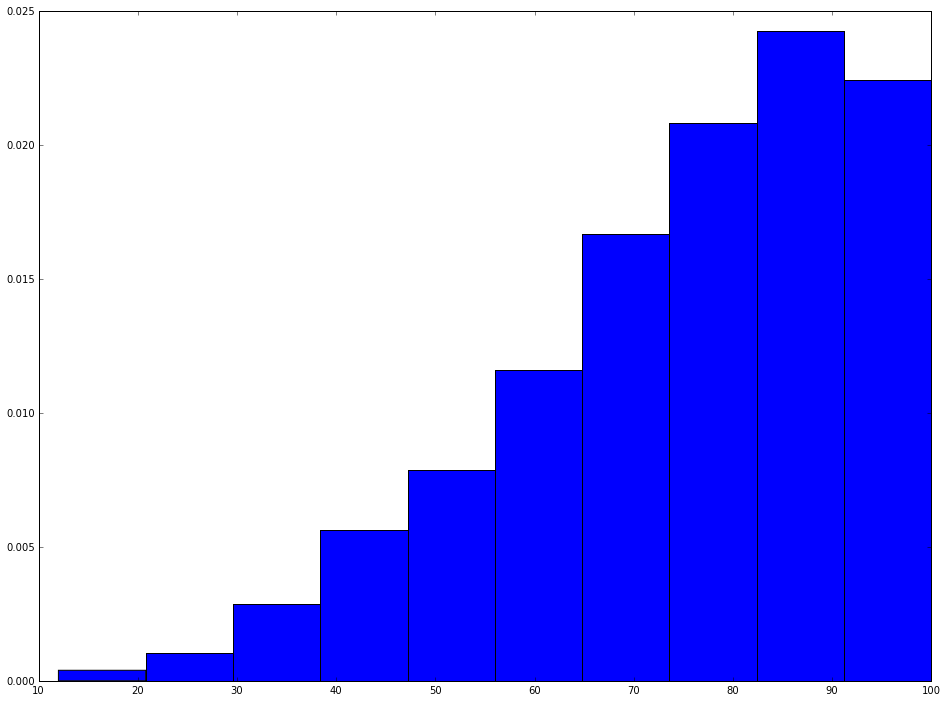

In [10]:
cycles = df['c(s)']
plt.hist(cycles, normed=True)

## Problem 3

## Part (A)

In [11]:
def run():
    N = 1000
    N_iterations = 200
    chrom_length = 3*(10**9)
    transposon_length = 3*1000
    mu = 0.05
    t_positions = []

    n_initial = np.random.random_integers(N-1)
    x_initial = np.random.random_integers(chrom_length-1)

    offspring_positions = []
    all_positions = [[] for t in range(N)]
    all_positions[n_initial].append(x_initial)
    all_t_count =[]

    for nn in range(N_iterations):
        for i in range(N):
            indicator = np.random.binomial(1,mu,len(all_positions[i]))
            temp_indices = []
            for ind, ind_value in enumerate(indicator):
                if ind_value == 1:
                    temp_indices.append(ind)

            for j in temp_indices:
                x_temp = np.random.random_integers(chrom_length-1)
                all_positions[i][j] = x_temp
                all_positions[i].append(np.random.random_integers(chrom_length-1))
        offspring_positions = [[] for t in range(N)]
        for j in range(N):
            y,z = np.random.random_integers(0,N-1,2)
            y_parent = np.random.binomial(1,0.5,len(all_positions[y]))
            z_parent = np.random.binomial(1,0.5,len(all_positions[z]))
            temp_y = []
            temp_z = []
            for index,value in enumerate(y_parent):
                if value>=1:
                      temp_y.append(all_positions[y][index])
            for index,value in enumerate(z_parent):
                if value>=1:
                      temp_z.append(all_positions[z][index])
            for t_y in temp_y:
                offspring_positions[j].append(t_y)
            for t_z in temp_z:
                offspring_positions[j].append(t_z)
        all_positions = offspring_positions
        count_t = 0
        count_x = []
        for p in range(N):
            count_t += len(all_positions[p])
            count_x.append(all_positions[p])
        survived_t = np.unique(count_x, return_counts=True)[1]
        all_t_count.append((count_t, len(survived_t[survived_t>=N*mu])))
    return all_t_count

In [46]:
all_t_count = run()
die_out_transposons = all_t_count

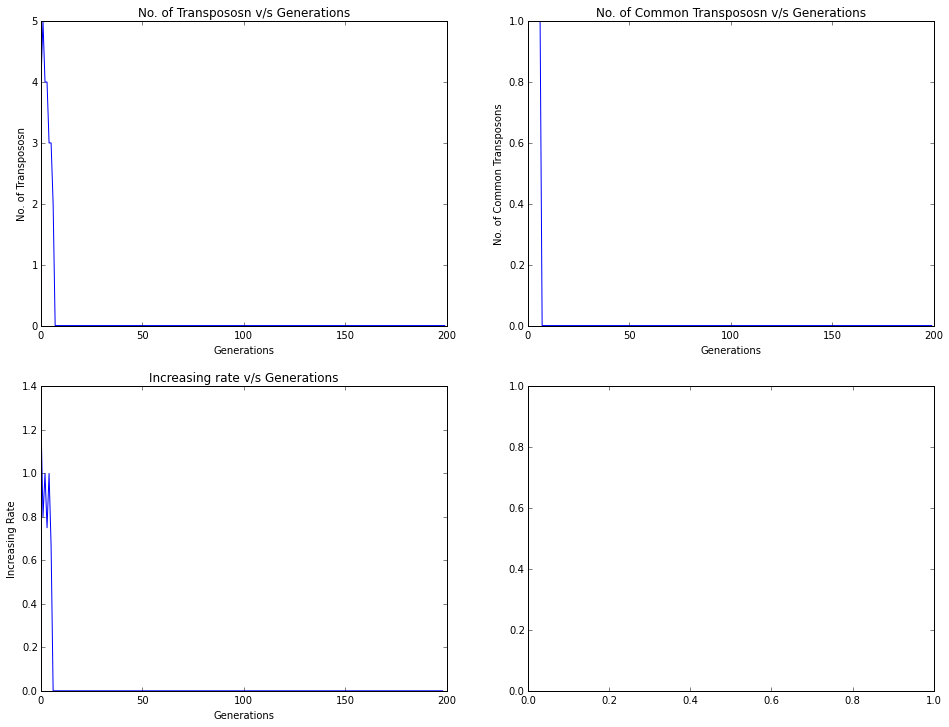

In [47]:
fig, axs = plt.subplots(2,2)
axs[0][0].plot([x[0] for x in die_out_transposons])
axs[0][0].set_title('No. of Transpososn v/s Generations')
axs[0][0].set_xlabel('Generations')
axs[0][0].set_ylabel('No. of Transpososn')

axs[0][1].plot([x[1] for x in die_out_transposons])
axs[0][1].set_title('No. of Common Transpososn v/s Generations')
axs[0][1].set_xlabel('Generations')
axs[0][1].set_ylabel('No. of Common Transposons')


increasing_rate = []
for i in range(1,len(die_out_transposons)):
    increasing_rate.append(die_out_transposons[i][0]/(die_out_transposons[i-1][0]+0.000001))
axs[1][0].plot(increasing_rate)
axs[1][0].set_title('Increasing rate v/s Generations')
axs[1][0].set_xlabel('Generations')
axs[1][0].set_ylabel('Increasing Rate')

### The above example shows one case when the "the transposon does not spread"

In [54]:
all_t_count = run()
nondie_out_transposons = all_t_count

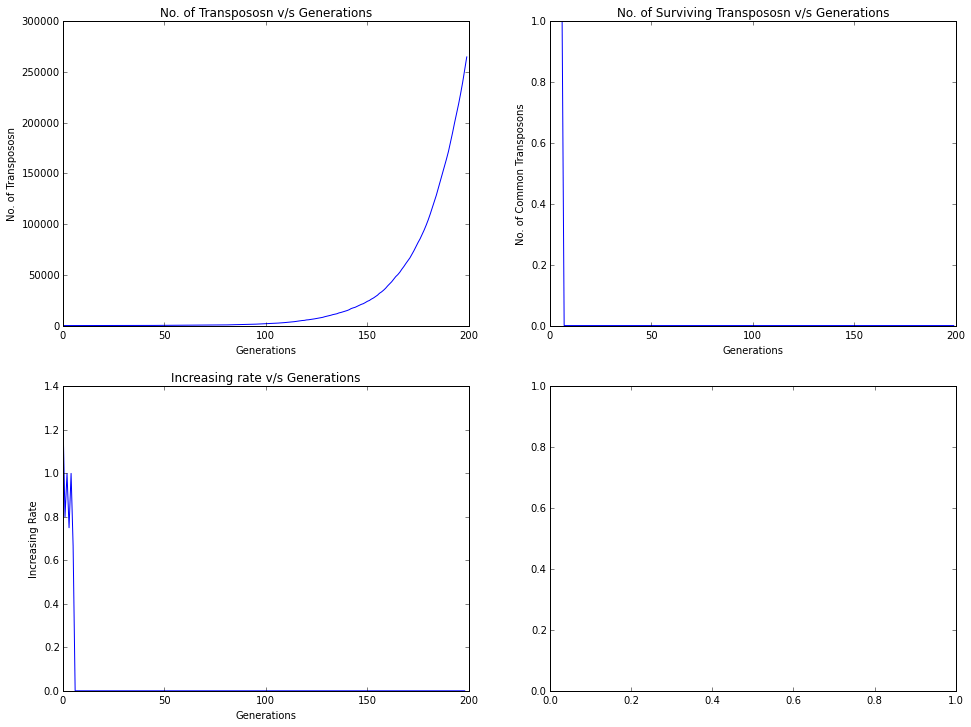

In [55]:
fig, axs = plt.subplots(2,2)
axs[0][0].plot([x[0] for x in nondie_out_transposons])
axs[0][0].set_title('No. of Transpososn v/s Generations')
axs[0][0].set_xlabel('Generations')
axs[0][0].set_ylabel('No. of Transpososn')

axs[0][1].plot([x[1] for x in die_out_transposons])
axs[0][1].set_title('No. of Surviving Transpososn v/s Generations')
axs[0][1].set_xlabel('Generations')
axs[0][1].set_ylabel('No. of Common Transposons')


increasing_rate = []
for i in range(1,len(die_out_transposons)):
    increasing_rate.append(die_out_transposons[i][0]/(die_out_transposons[i-1][0]+0.000001))
axs[1][0].plot(increasing_rate)
axs[1][0].set_title('Increasing rate v/s Generations')
axs[1][0].set_xlabel('Generations')
axs[1][0].set_ylabel('Increasing Rate')

### The above example shows one case when the "the transposon does spread", with rate being exponential and the common transposons still being limited

## Part (B)

Treating the total number of transposons $N(t)$ at any time $t$ to be a branching process, then $N(t+1) = \sum_{i=1}^{N(t)} W_{t,i}$ Where $W_{t,i}$ is the number of locations of the $i^{th}$ transposon in the offspring.

Now consider $E[N_t]$

Claim: $E[N_t] = (1+\mu)^t$

Proof: 
With probability of $\mu$ the transposon undergoes becomes 2 from 1. and hence $W_{t,i}$, the number  of locations of the $i^{th}$ transposon in the offspring is a poisson random varaible with mean $1+\mu$

$W_k \sim Poisson(1+\mu)$
$$
\begin{align*}
E[N_t] = E[\sum_{i=1}^{N(t-1)} W_{t,i}] &= E[E[\sum_{i=1}^{n} W_{t,i}|N(t-1)=n]]\\ 
&= E[N(t-1)] \times (1+\mu)\\
&= N(1+\mu)^t
\end{align*}
$$




Thus, the expected number of total transposons is an exponential.


## Part (C)

$P(X>0) \leq EX$

Consider $X_t$ as the total number of trasposon copies at location $x$ at generation $t$ 
For each new generation, the new arrival at $x$ is a poisson process with mean = $2 \times \mu \times N(t) \times \frac{1}{L}$. Let $R(t)$ represent the new arrivals at x

$N(t)$ represents the number of transposon copies of the transposon suriving for $t$ generations!
Then, $E[N_1]=1+\mu$ By indution, $E[N_t] = (1+\mu)^t$

Thus, $R(t) \sim \text{Poisson}(\frac{2\mu N(t)}{L})$

Now Using a branching process model for number of transposon copies located at location $x$, the offspring mean number of offspring transposons is = $(1-\mu)*1 + \mu*2 = 1+\mu$

Let $Z_{t,k}(u)$= Number of offspring copies of $k^{th}$ transposon at $x$ that occured at time $t$ inserted at time u ($u \leq t)

Using branching process property, $E[Z_{t,k}(t+u)] = (1+\mu)^u$

Then 

$$
\begin{align*}
EX_t &= \sum_{u \leq 0} \sum_{k=1}^{R(u)} Z_{u,k}(0)\\ 
&= \sum_{u \leq 0}E[R(u)]E[Z_{u,1}(0)]\\ 
&= \sum_{u \leq 0} (1+\mu)^t \frac{2 N \mu }{L} \times (1+\mu)^u \\
&=  \sum_{u\geq 0}(1+\mu)^t \frac{2 N \mu }{L(1+\mu)^u}\\
&\approx \frac{2 \mu }{L}\times(1+\frac{1}{\mu})\\
&= \frac{2}{L}(1+\mu)^{t+1}
\end{align*}
$$

Thus, $P(X>0) \leq \frac{2}{L}(1+\mu)^{t+1}$

## Part (D)

$\mu = 10^{-2}$

$N = 10^7$

For an individual $ EX = \frac{2}{L}(1+\mu)^{t+1} \times \frac{1}{N} = \frac{2}{NL}(1+\mu)^{t+1} $

Now, $\frac{2}{NL}(1+\mu)^{t+1}=0.1L$ $\implies$ $(1+\mu)^{t+1}=0.1NL^2/2$


In [39]:
from math import log
N=10**7
mu=0.01
L=3*(10**9)

In [41]:
t = log(0.1*N*L*L/2)/log(1+mu)

In [42]:
print(t)

5704.94795262


Thus it takes `t=5703` generations for transposons to conver 10% of genome(I ignored the length of transposon itself)